In [1]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#reading the dataset
df = pd.read_csv('temprature.csv',index_col='Date', parse_dates = True)

In [3]:
#showing the first values of the dataset
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


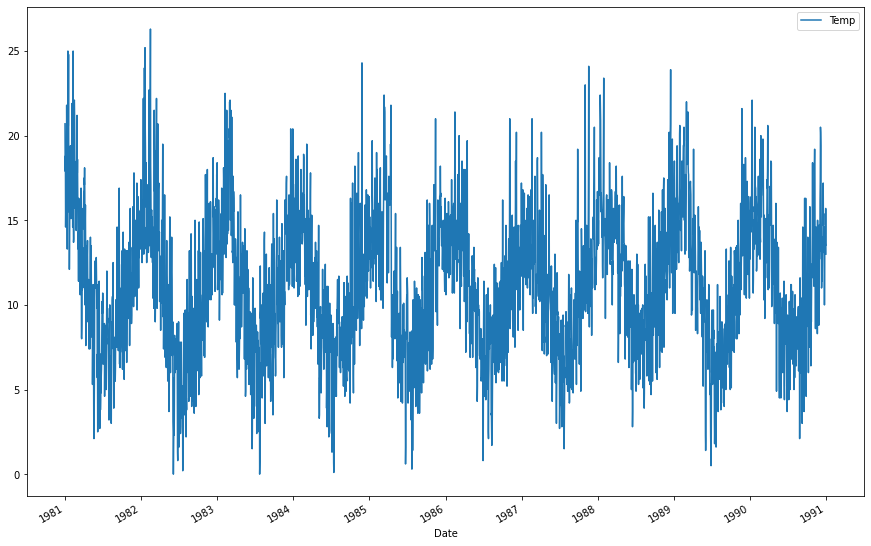

In [4]:
#plotting the values
df.plot(figsize=(15,10))

In [5]:
#checking the length of the data frame
len(df)

3650

In [6]:
#rnn can work on non stationary data as well.
#dividing the data into test and train 
train = df.iloc[:3380]
test = df.iloc[3380:] 

In [7]:
#importing min-max scaler for data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
#showing the head and tail of the data set
df.head(), df.tail()

(            Temp
 Date            
 1981-01-01  20.7
 1981-01-02  17.9
 1981-01-03  18.8
 1981-01-04  14.6
 1981-01-05  15.8,             Temp
 Date            
 1990-12-27  14.0
 1990-12-28  13.6
 1990-12-29  13.5
 1990-12-30  15.7
 1990-12-31  13.0)

In [9]:
#transforming the data between 0 and 1 
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [10]:
#testing if the values are between 0 and 1 
scaled_test[:6]

array([[0.64638783],
       [0.60076046],
       [0.57794677],
       [0.57414449],
       [0.55893536],
       [0.70342205]])

In [11]:
#selecting the number of inputs and setting the generator 
from keras.preprocessing.sequence import TimeseriesGenerator
input_data = 100
feautures= 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length =input_data , batch_size =1)

In [25]:
#importing libraries for our model 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten

In [26]:
#defining our model 
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(1))





model.compile(optimizer='adam', loss= 'mse')

In [100]:
#fitting the model
model.fit(generator, epochs = 2 )

Epoch 1/2
3280/3280 [==============================] - 369s 113ms/step - loss: 0.0038
Epoch 2/2
3280/3280 [==============================] - 370s 113ms/step - loss: 0.0035


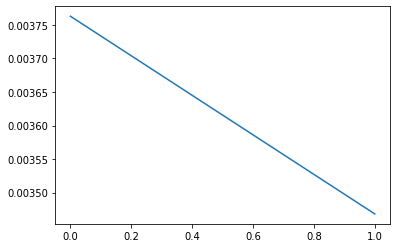

In [101]:
#plotting the loss
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [102]:
#taking the last trained batch to predict the first element 
last_trained_batch = scaled_train[-100:]
last_trained_batch = last_trained_batch.reshape(1,input_data,feautures)

In [103]:
model.predict(last_trained_batch)

array([[0.47774848]], dtype=float32)

In [104]:
scaled_test[0]

array([0.64638783])

In [105]:
#predictions 
test_predictions =[]
first_eval_batch = scaled_train[-input_data:]
current_batch = first_eval_batch.reshape(1,input_data,feautures)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis= 1)

In [106]:
test_predictions

[array([0.47774848], dtype=float32),
 array([0.4277966], dtype=float32),
 array([0.4466408], dtype=float32),
 array([0.48735696], dtype=float32),
 array([0.46829125], dtype=float32),
 array([0.4410293], dtype=float32),
 array([0.42045563], dtype=float32),
 array([0.46210748], dtype=float32),
 array([0.42433336], dtype=float32),
 array([0.42567995], dtype=float32),
 array([0.42028362], dtype=float32),
 array([0.42874315], dtype=float32),
 array([0.45045972], dtype=float32),
 array([0.42808324], dtype=float32),
 array([0.4448266], dtype=float32),
 array([0.45073375], dtype=float32),
 array([0.5000553], dtype=float32),
 array([0.5087599], dtype=float32),
 array([0.53657424], dtype=float32),
 array([0.5302847], dtype=float32),
 array([0.5280865], dtype=float32),
 array([0.51776356], dtype=float32),
 array([0.44164953], dtype=float32),
 array([0.43073186], dtype=float32),
 array([0.46051216], dtype=float32),
 array([0.44853863], dtype=float32),
 array([0.4116018], dtype=float32),
 array([0.

In [107]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


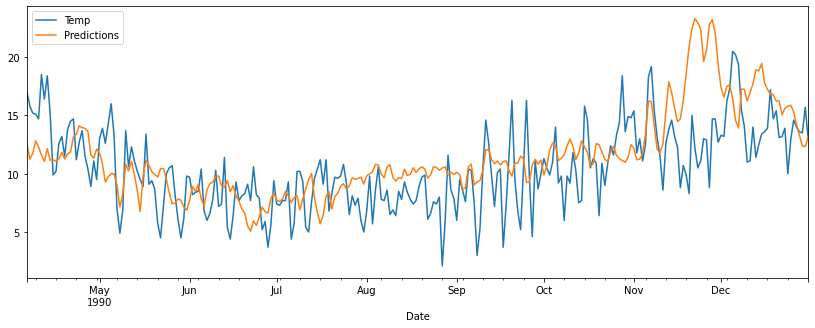

In [108]:
#compairing the actual values with the predicted ones
test.plot(figsize=(14,5))

In [99]:
#compairing the actual values with the predicted ones 
test.head

<bound method NDFrame.head of             Temp  Predictions
Date                         
1990-04-06  17.0    11.925854
1990-04-07  15.8     9.865486
1990-04-08  15.2    10.666123
1990-04-09  15.1    12.221803
1990-04-10  14.7    12.633425
...          ...          ...
1990-12-27  14.0     9.724067
1990-12-28  13.6     8.268772
1990-12-29  13.5     7.274406
1990-12-30  15.7     7.200798
1990-12-31  13.0     8.865670

[270 rows x 2 columns]>